M2780.002400 Machine Listening (Fall 2020)

Instructor: Kyogu Lee (kglee@snu.ac.kr)

# Assignment 1: Fundamentals of DSP for Audio/Music

(160 points)

**Due Date : This assignment is due by 12:59PM (before the class starts), September 15 (Tuesday)**



---

Assignment

Each assignment is composed of two parts: a) in the theory part, you are required to solve the problem set, write down your answers on paper (also, typing your answers using PC or using tablet PC are fine), and send the scanned version (name_hw1.pdf) via **ETL**; b) for the lab assignment, you will need to write Notebook scripts and/or functions as required and submit them electronically (via **ETL**) by the end of the due date.



# Theory (60pts)



---



1.   Sampling theorem (10pts)

*   a. Explain the Nyquist limit.
*   b. According to the sampling theorem, what is the highest cutoff frequency of a low-pass filter you must use in order to avoid aliasing given the sampling rate of 10 kHz (assume an ideal brick-wall filter)?



---


2.   Sinusoids (10 pts)

*   a. For a sinusoid with a period  $ T_0 = 0.8 $  seconds, what is the frequency $ f_0 $ in Hz?
*   b. If we sample the above sinusoid with the sampling rate $ f_s = 8000 $ Hz, what value do we obtain at the $ 100^{th} $ sample (i.e., $ n = 100 $ ), assuming the peak amplitude $ A = 1 $ and the initial phase $ \phi_0 = 0 $ ?



---


3.   DFT (20 pts)

 Find the length $ N = 8 $ DFTs 
 
 $$  X_i(k), k = 0,1,...6,7 $$
 
 for the following $ X_i(n) $  sequences (don’t use Python):


*   a. $ x_1 = [1,0,0,0,0,0,0,0] $
*   b. $ x_2 = [0,1,0,0,0,0,0,0] $
*   c. $ x_3 = [1,1,1,1,1,1,1,1] $
*   d. $ x_4 = [1,-1,1,-1,1,-1,1,-1] $
 
 (Hints : Remember Euler’s formula; i.e.,  $  e^{jq} = \cos q+ j \sin q $ )



---


4.   Zero padding (20pts)

 The zero padding factor or $zpf$ is the ratio of the length of the zero-padded signal ( $N$ ) to the length of the original signal ($M$): i.e.,
 
 $$ zpf = \frac{N}{M} $$


*   a. Explain zero padding.
*   b. Assume you want to analyze a sinusoid whose frequency is $f_0 = 10 $ Hz with the sampling rate $f_s = 8000$ Hz, using the 1000-point FFT. What $zpf$ do you need to have the peak magnitude bin frequency correspond exactly to the correct frequency of the sinusoid?




---



# Lab (100pts)

For all lab assignments, submit your Notebook file (.ipynb) via **ETL**. The Notebook file should be named with your full name and the homework number – e.g., JohnDoe_hw1.ipynb. 

In addition to writing Python scripts and/or functions in your Notebook file, there are also questions you’ll have to answer. For such questions, you should provide answers in your Notebook file using Text sections.

**Please submit the codes executed (make sure that the results of your codes are visible in the submitted assignments) so that the grader can check whether the code is working or not.**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf



---


1.   Sinusoids (10pts)

Write a function that generates a sine wave. Your function should take four parameters as an input – peak amplitude, frequency in Hz, initial phase in radians, duration in seconds, and the sampling frequency in Hz – and output a sinusoidal wave as a vector. The syntax of your function should look like:


In [2]:
def sinewave(amp,freq,phs,dur,fs):

    # Put your comments here to describe your function – what it does, what are the input arguments, etc.
    '''
    ### input parameters
    amp : amplitude of sine wave
    freq : frequency of sine wave(in Hz)
    phs : initial phase(in radian)
    dur : time length(duration) of sine wave
    fs : sampling frequency(in Hz)
    '''
    # !!!! your code here !!!!
    y = amp * np.sin(2 * np.pi * freq * np.arange(0, dur, 1 / fs) + phs)
    
    return y


Generate a few sinusoids with different amplitudes, frequencies, phases, durations, and/or sampling rate, and listen to them using IPython.display module

In [3]:
import IPython.display as ipd
import IPython.display as display

sinewave_1 = [1, 440, np.pi/2, 2, 44100]
print('sinewave 1')
display.display(ipd.Audio(sinewave(sinewave_1[0], sinewave_1[1], sinewave_1[2], sinewave_1[3], sinewave_1[4]),
                          rate=sinewave_1[4], autoplay=False))

sinewave_2 = [0.5, 220, 0, 2, 44100]
print('sinewave 2')
display.display(ipd.Audio(sinewave(sinewave_2[0], sinewave_2[1], sinewave_2[2], sinewave_2[3], sinewave_2[4]),
                          rate=sinewave_2[4], autoplay=False))

sinewave_3 = [2, 880, np.pi/4, 2, 44100]
print('sinewave 3')
display.display(ipd.Audio(sinewave(sinewave_3[0], sinewave_3[1], sinewave_3[2], sinewave_3[3], sinewave_3[4]),
                          rate=sinewave_3[4], autoplay=False))

sinewave_4 = [3, 1320, np.pi/8, 2, 44100]
print('sinewave 4')
display.display(ipd.Audio(sinewave(sinewave_4[0], sinewave_4[1], sinewave_4[2], sinewave_4[3], sinewave_4[4]),
                          rate=sinewave_4[4], autoplay=False))

sinewave 1


sinewave 2


sinewave 3


sinewave 4




---


2.   Additive synthesis (20 pts)

Fourier theorem says any periodic signal can be described by a sum of sinusoids. Google the following periodic waves to find out how to synthesize them using sinusoids with different amplitudes, frequencies and phases. Write a python script to generate them using the function from the previous problem. Try different number of sinusoids ($ N = 5,10,30,100 $) and save each sound as a waveform using librosa.output.write_wav.



*   a. Square wave (square_N5.wav, square_N10.wav, square_N30.wav, square_N100.wav)
*   b. Triangle wave (triangle_N5.wav, triangle_N10.wav, triangle_N30.wav, triangle_N100.wav)
*   c. Sawtooth wave (sawtooth_N5.wav, sawtooth_N10.wav, sawtooth_N30.wav, sawtooth_N100.wav)


You should use the fundamental frequency $ f_0 = 440 $ Hz, and your sounds should be 1 second long. Plot the first five periods of three waves in one figure using matplotlib.pyplot.subplot. In each plot, display all four waves (with different number of sinusoids) in different colors and denote which uses how many sinusoids. You should save your sound files and plots, and include them in your submission.

a. Square wave


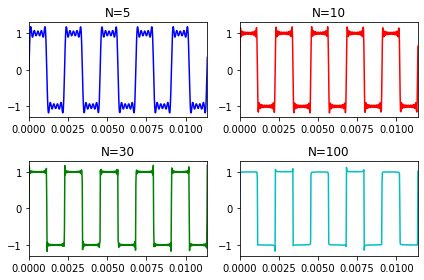

b. Triangle wave


<Figure size 432x288 with 0 Axes>

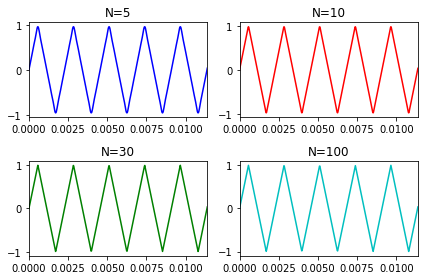

c. sawtooth wave


<Figure size 432x288 with 0 Axes>

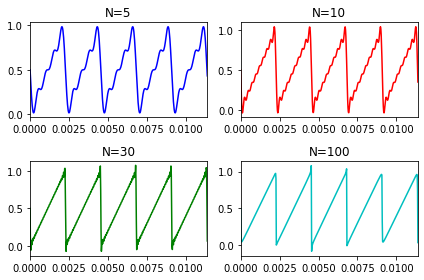

<Figure size 432x288 with 0 Axes>

In [34]:
# !!!! your code here !!!!

dur = 1
fs = 44100
f0 = 440
t = np.linspace(0, dur, int(fs*dur))
Ns = [5, 10, 30, 100]
color = ['b', 'r', 'g', 'c']
# Square wave
def make_square_wave(N):
    square_wave = np.zeros(len(np.arange(0, dur, 1/fs)))   
    for n in range(1, N+1):
        square_wave += sinewave(4/(np.pi*(2*n-1)), f0*(2*n-1), 0, 1, fs)
    return square_wave

# Triangle wave
def make_triangle_wave(N):
    triangle_wave = np.zeros(len(np.arange(0, dur, 1/fs)))   
    for n in range(1, N+1):
        triangle_wave += sinewave(8*(-1)**(n-1)/(np.pi*np.pi*((2*n-1)**2)), f0*(2*n-1), 0, 1, fs)
    return triangle_wave

# Sawtooth wave
def make_saw_wave(N):
    saw_wave = np.zeros(len(np.arange(0, dur, 1/fs)))   
    for n in range(N):
        if n == 0:
            saw_wave += np.ones(len(np.arange(0, dur, 1/fs))) / 2.
        else:
            saw_wave -= sinewave(1 / (np.pi * n), f0 * n, 0, 1, fs)
    return saw_wave
      
print("a. Square wave")
fig = plt.figure()
for i, N in enumerate(Ns):
    ax = fig.add_subplot(2,2,i+1)
    square_wave = make_square_wave(N)
    ax.set(xlim=[0., 5/f0], title='N={}'.format(N))
    ax.plot(t, square_wave[0:int(fs*dur)], color[i])
    sf.write('./square_N{}.wav'.format(N), saw_wave, fs)

fig.tight_layout()
plt.show()
plt.clf()

print("b. Triangle wave")
fig = plt.figure()
for i, N in enumerate(Ns):
    ax = fig.add_subplot(2,2,i+1)
    triangle_wave = make_triangle_wave(N)
    ax.set(xlim=[0., 5/f0], title='N={}'.format(N))
    ax.plot(t, triangle_wave[0:int(fs*dur)], color[i])
    sf.write('./triangle_N{}.wav'.format(N), saw_wave, fs)

fig.tight_layout()
plt.show()
plt.clf()

print("c. sawtooth wave")
fig = plt.figure()
for i, N in enumerate(Ns):
    ax = fig.add_subplot(2,2,i+1)
    saw_wave = make_saw_wave(N)
    ax.set(xlim=[0., 5/f0], title='N={}'.format(N))
    ax.plot(t, saw_wave[0:int(fs*dur)], color[i])
    sf.write('./saw_N{}.wav'.format(N), saw_wave, fs)

fig.tight_layout()
plt.show()
plt.clf()



---



3.   FFT analysis (10 pts)

Write a python script that reads the sound files you generated in the previous problem, and that performs spectral analysis using numpy.fft.fft. Try different FFT sizes ($ N = 128,512,2018,8192 $) and plot the magnitudes of FFTs.

Use one plot for each waveform and matplotlib.pyplot.subplot to plot FFTs with different sizes.



In [19]:
# !!!! your code here !!!!
def read_wave(path):
    data, _ = sf.read(path)
    return data

def plot_fft(wave):
    N=128
    x_fft = wave[0:N]
    X = np.fft.fft(x_fft)
    Xdb = 20 * np.log10(np.absolute(X) + np.finfo(float).eps)
    Xdb = list(Xdb)

    N=512
    x_fft = wave[0:N]
    X = np.fft.fft(x_fft)
    Xdb = 20 * np.log10(np.absolute(X) + np.finfo(float).eps)
    Xdb = list(Xdb)

    N=2018
    x_fft = wave[0:N]
    X = np.fft.fft(x_fft)
    Xdb = 20 * np.log10(np.absolute(X) + np.finfo(float).eps)
    Xdb = list(Xdb)

    N=8192
    x_fft = wave[0:N]
    X = np.fft.fft(x_fft)
    Xdb = 20 * np.log10(np.absolute(X) + np.finfo(float).eps)
    Xdb = list(Xdb)
    
'''
plot_fft(wave_1)
plot_fft(wave_2)
plot_fft(wave_3)
plot_fft(wave_4)
'''


print(read_wave('./sawtooth_N10.wav').shape)

(44100,)


How does each plot look as the FFT size varies? Do you see the peaks of the sinusoids at the expected locations and how do they vary as the FFT size changes? Explain these.

***!!!! your explanation here !!!!***



---



4.   Zero padding (20 pts) 



*   a. Create a 1 second sinusoid at 100.25 Hz using a sampling rate of 1024 Hz.
*   b. Plot the magnitude spectrum of the sinusoid. Use matplotlib.pyplot.xlim to zoom in the plot to show the frequency range of 95-105 Hz.
*   c. Zero-pad your sinusoid by a factor of 2 (i.e., $zpf = 2$), and repeat b.
*   d. Repeat zero padding while you increase the $zpf$. Find the minimum $zpf$ you need to have the sinusoidal peak appear at the correct frequency. Plot the magnitude spectrum.




In [ ]:
# !!!! your code here !!!!




---




5.   Windowing (20 pts)


Using a python script you wrote in the previous assignment, generate a 0.1 second sawtooth wave with 5 harmonic series using the fundamental frequency of 440 Hz and the sampling rate of 8000 Hz.



*   a. Plot the sawtooth wave and the magnitude spectrum in one figure using matplotlib.pyplot.subplot.
*   b. Apply a window of your choice. Plot the windowed signal and the magnitude spectrum in one figure using matplotlib.pyplot.subplot.
*   c. Zero-pad your windowed signal by a factor of 5 and plot the magnitude spectrum.
*   d. Repeat a-c for a square wave and a triangular wave.


In [ ]:
# !!!! your code here !!!!




---



6.   Short-time Fourier Transform (20 pts)

Write a python function that generates a spectrogram of an input signal. It should take four arguments as inputs – input signal, sampling rate, FFT size in samples, window signal, and overlap between two consecutive frames in samples – and the outputs are the spectrogram, time indices in seconds, and frequency indices in Hz. Your function should look like the following:



```
def myspectrogram(x, fs, nfft, win,  novlp):

      # Put your comments here to describe your function – what it does, what are the input arguments, etc.


      your code

  return [y, t, f]
```




*   a. Using your function, compute the spectrogram of T08-violin.wav available from the course homepage.
*   b. Plot the magnitude spectrogram of the signal using librosa.display.specshow. Your x-axis must be time in seconds and y-axis frequency in Hz up to the half the sampling rate.
*   c. Repeat b using librosa’s built-in librosa.core.stft function. Compare it with your version of spectrogram using matplotlib.pyplot.subplot.







 

 



In [ ]:
# !!!! your code here !!!!